In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.vgg19 import preprocess_input

model = tf.keras.applications.VGG19(weights='imagenet')
input_shape = model.input_shape

In [ ]:
images = []
for i in range(1, 4):
  image = plt.imread(str(i)+'.jpg')
  image = tf.image.resize(image, (input_shape[1], input_shape[2]))
  image = preprocess_input(image)[None, ...]
  images.append(image)

In [ ]:
def show_prediction(id_image, model, number_of_instances=7, list_with_id_of_ending_layers = [2, 7, 15, 20]):
  image = images[id_image]
  fig, axes = plt.subplots(nrows=len(list_with_id_of_ending_layers), ncols=number_of_instances, figsize=(25, 25))

  for i_row in range(len(list_with_id_of_ending_layers)):
    last_layer = list_with_id_of_ending_layers[i_row]
    model = tf.keras.models.Sequential(model.layers[:last_layer+1])
    pred = model.predict(image)
    len_of_pred = pred.shape[-1]
    needed_ids = np.random.choice(np.arange(len_of_pred), number_of_instances)
    needed_preds = pred[:, :, :, needed_ids][0]
    for i_col in range(number_of_instances):
      axes[i_row, i_col].imshow(needed_preds[:, :, i_col])
      axes[i_row, i_col].set_xticks([])
      axes[i_row, i_col].set_yticks([])
  plt.show()

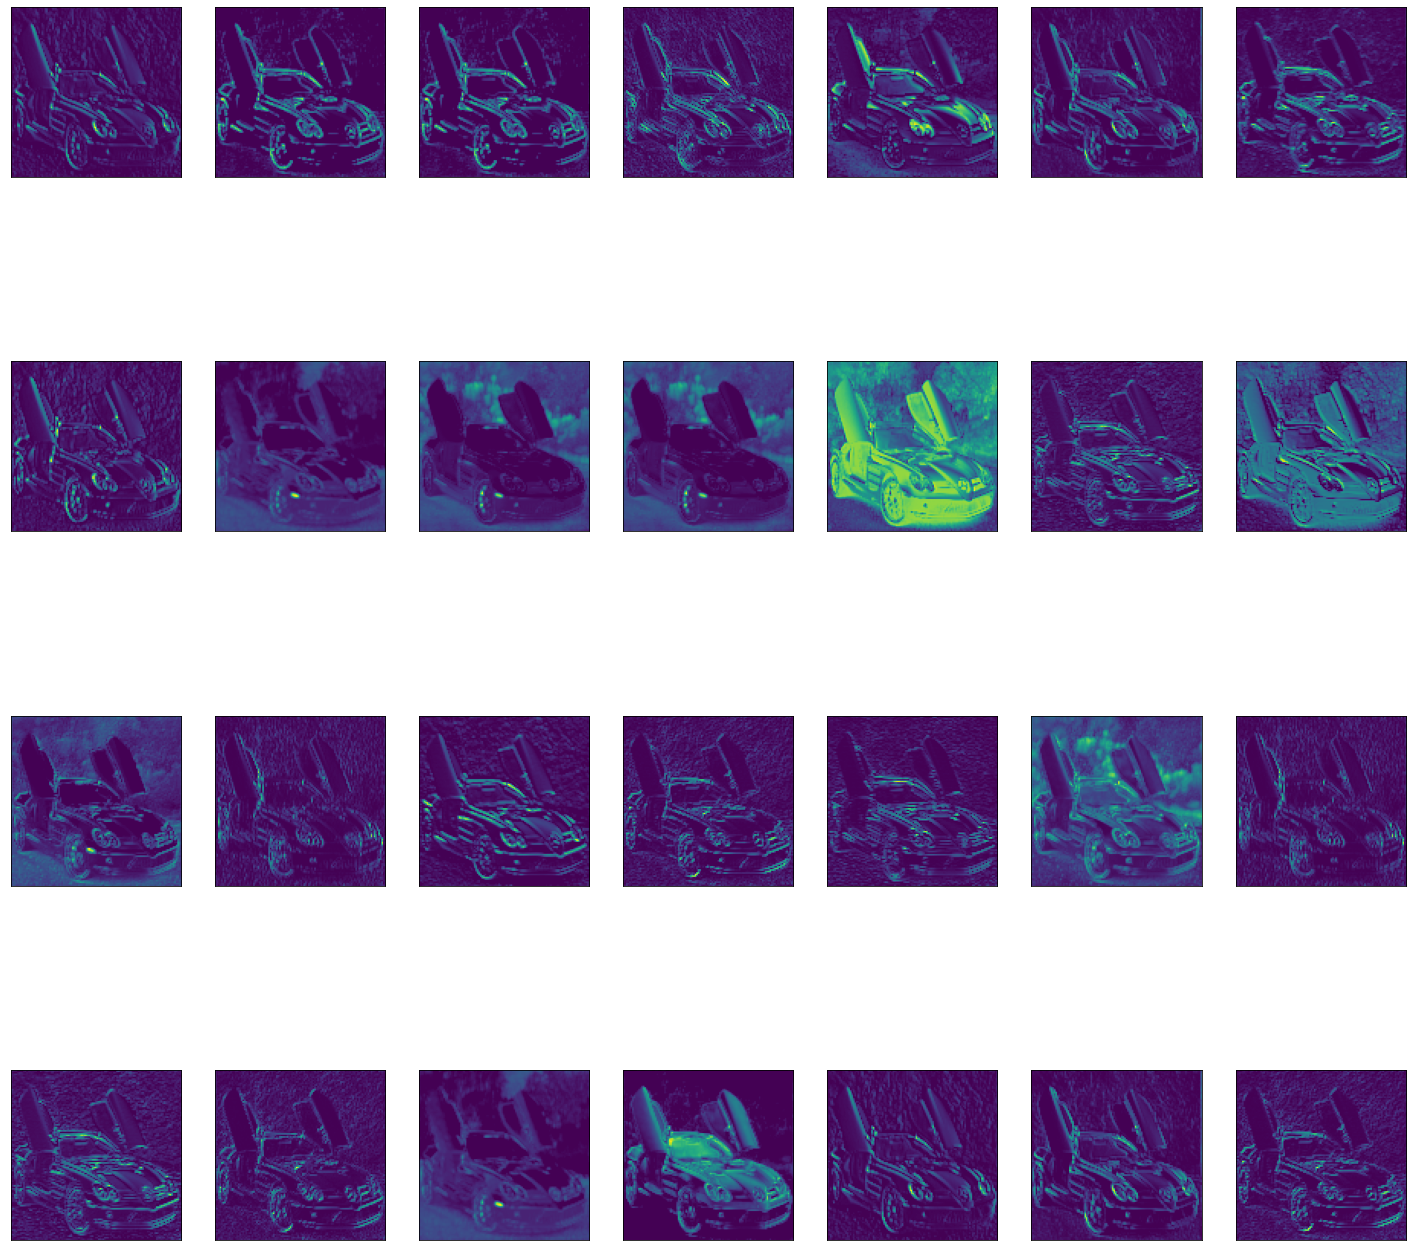

In [ ]:
show_prediction(1, model)

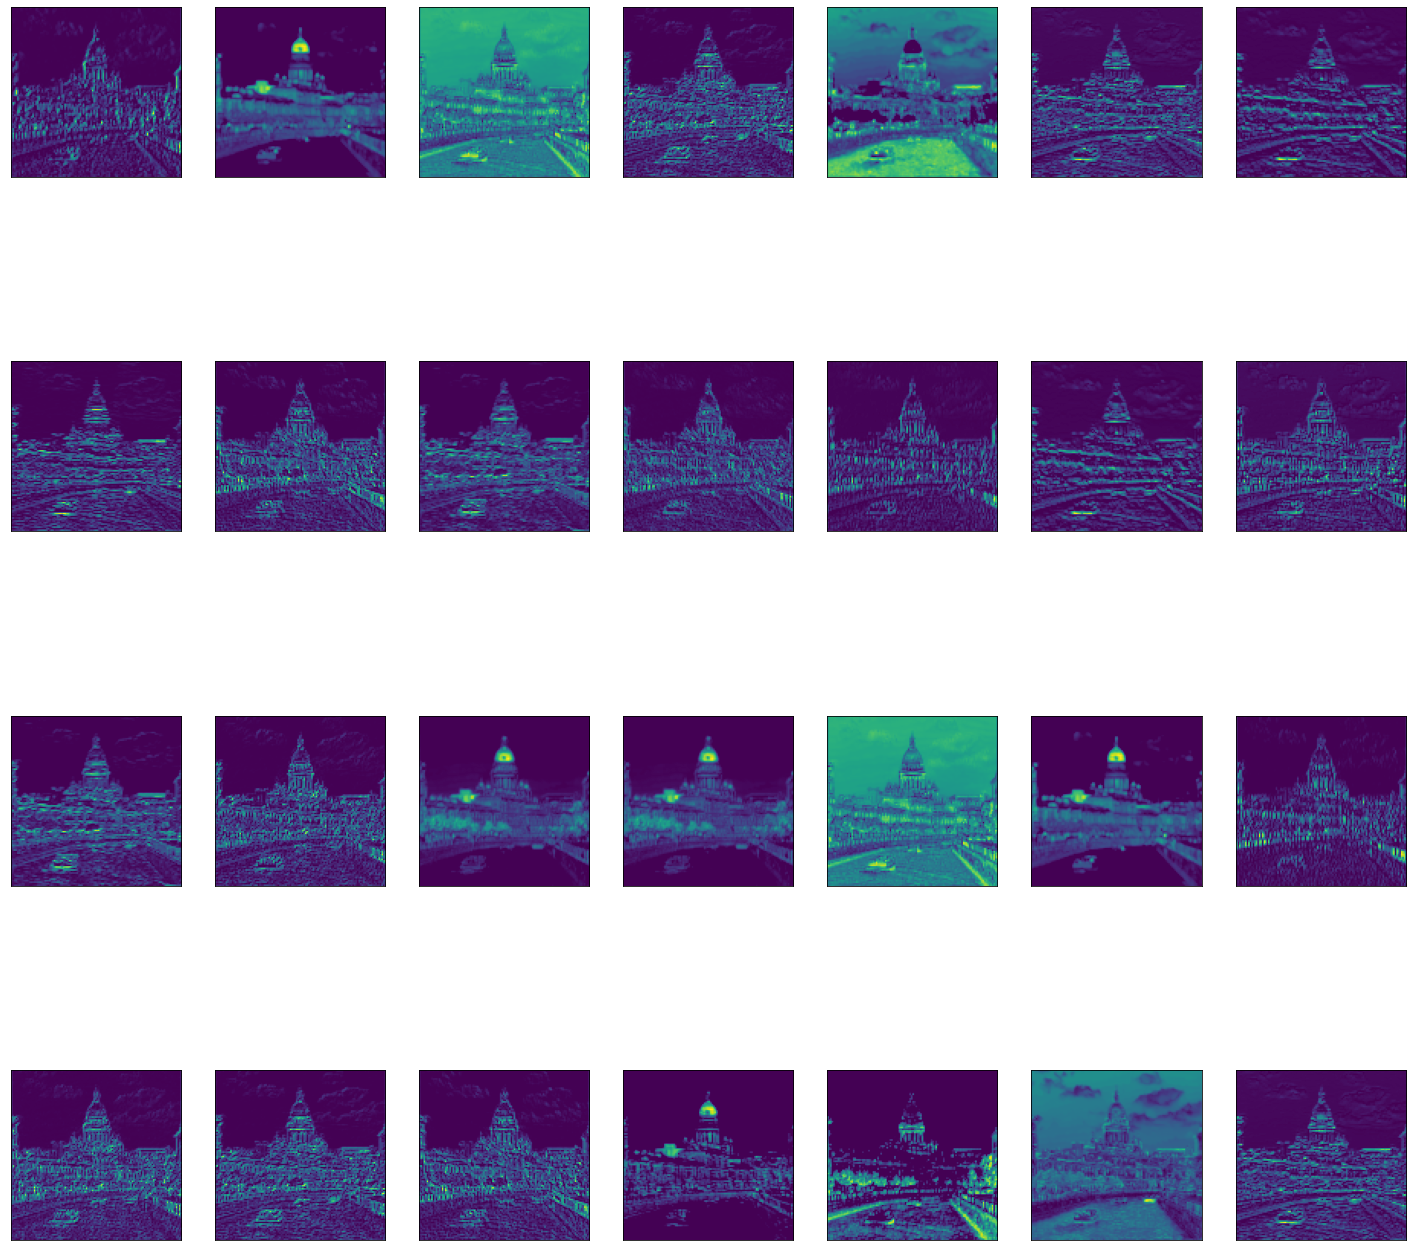

In [ ]:
show_prediction(2, model)

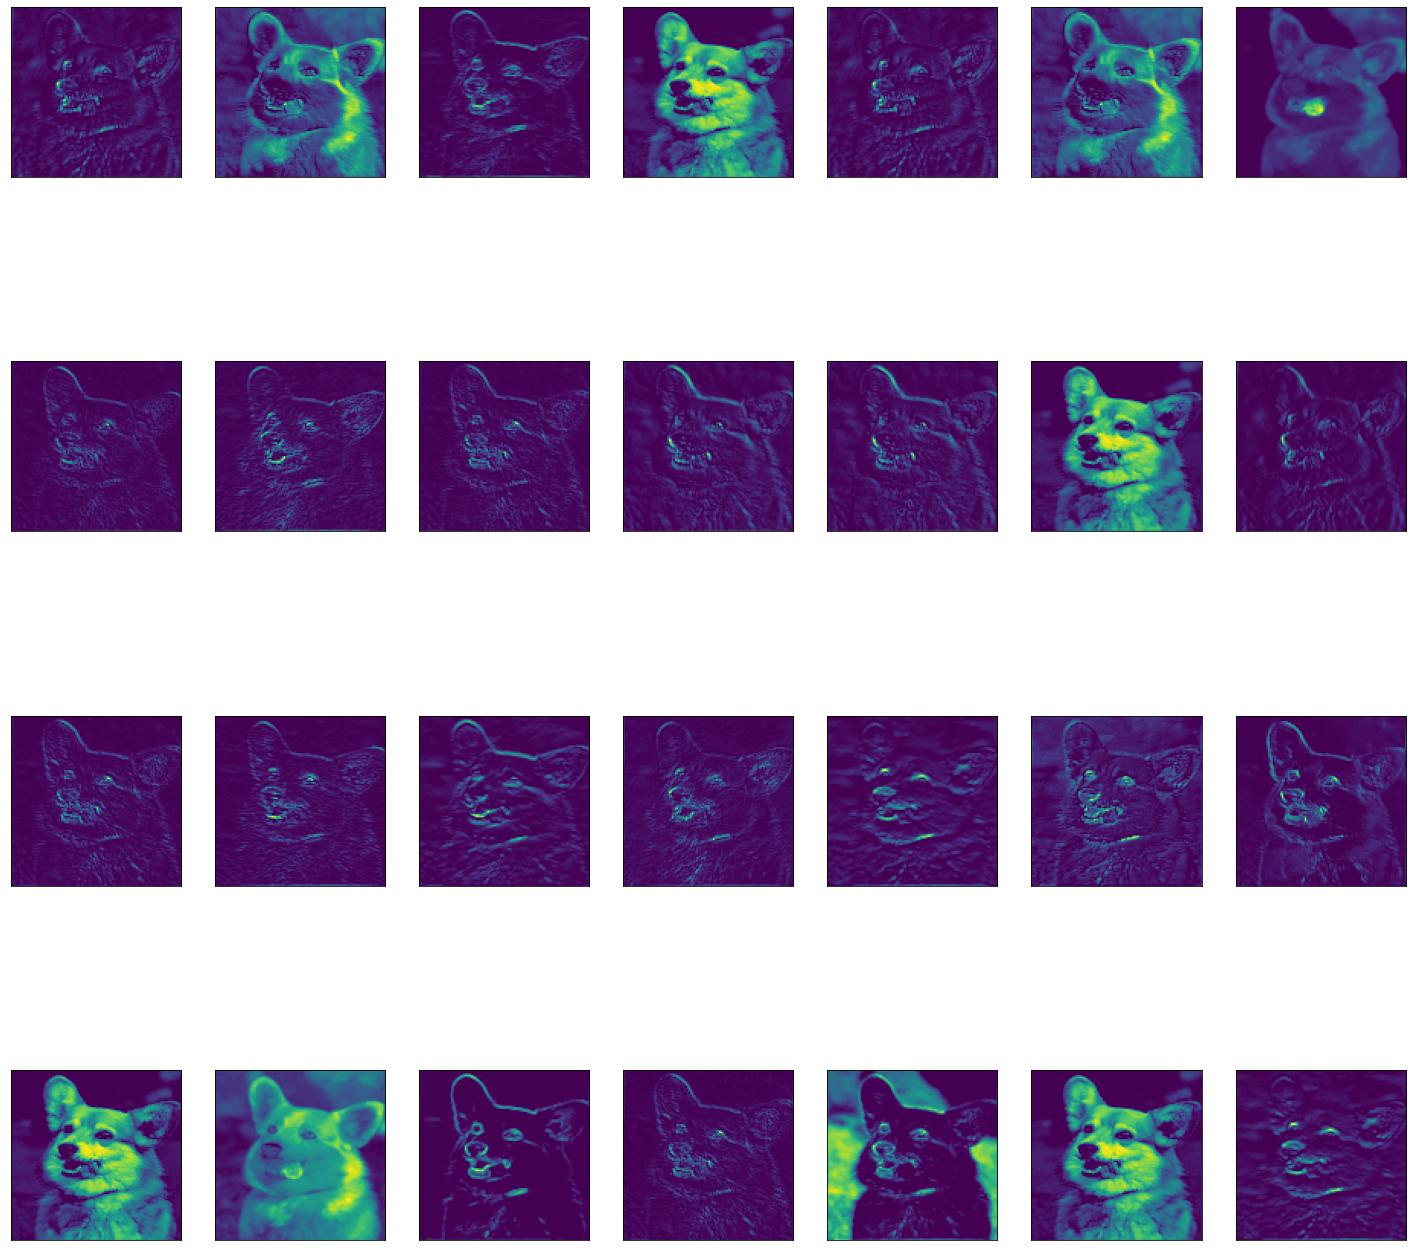

In [ ]:
show_prediction(0, model)